# importing modules


In [361]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [362]:
import warnings
warnings.simplefilter('ignore')

# reading data


### This dataset contains some info about top-1000 IMDB movies of all time.

In [363]:
data_df = pd.read_csv("imdb_top_1000.csv")
display(data_df.head(7))


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"


# removing empty cells and changing inconvinient data types

In [364]:
data_df['Released_Year'] = data_df['Released_Year'].fillna(0)
data_df['Gross'] = data_df['Gross'].fillna(0)
time = list(data_df['Runtime'])
gross = list(data_df['Gross'])
year = list(data_df['Released_Year'])
for i in range(len(time)):
    time[i] = int(time[i].split()[0])
    if gross[i] == 0:
        pass
    else:
        gross[i] = int(''.join(str(gross[i]).split(',')))
    

In [365]:
data_df['Runtime'] = time
data_df['Gross'] = [int(x) for x in gross]
data_df['Released_Year'] = [int(x) if x.isdigit() else 2000 for x in year]
new_genre = []
for i in list(data_df['Genre']):
    new_genre.append(i.split(',')[0])
data_df['Genre'] = new_genre
display(data_df.head(5))

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


# trying to find interesting tendencies

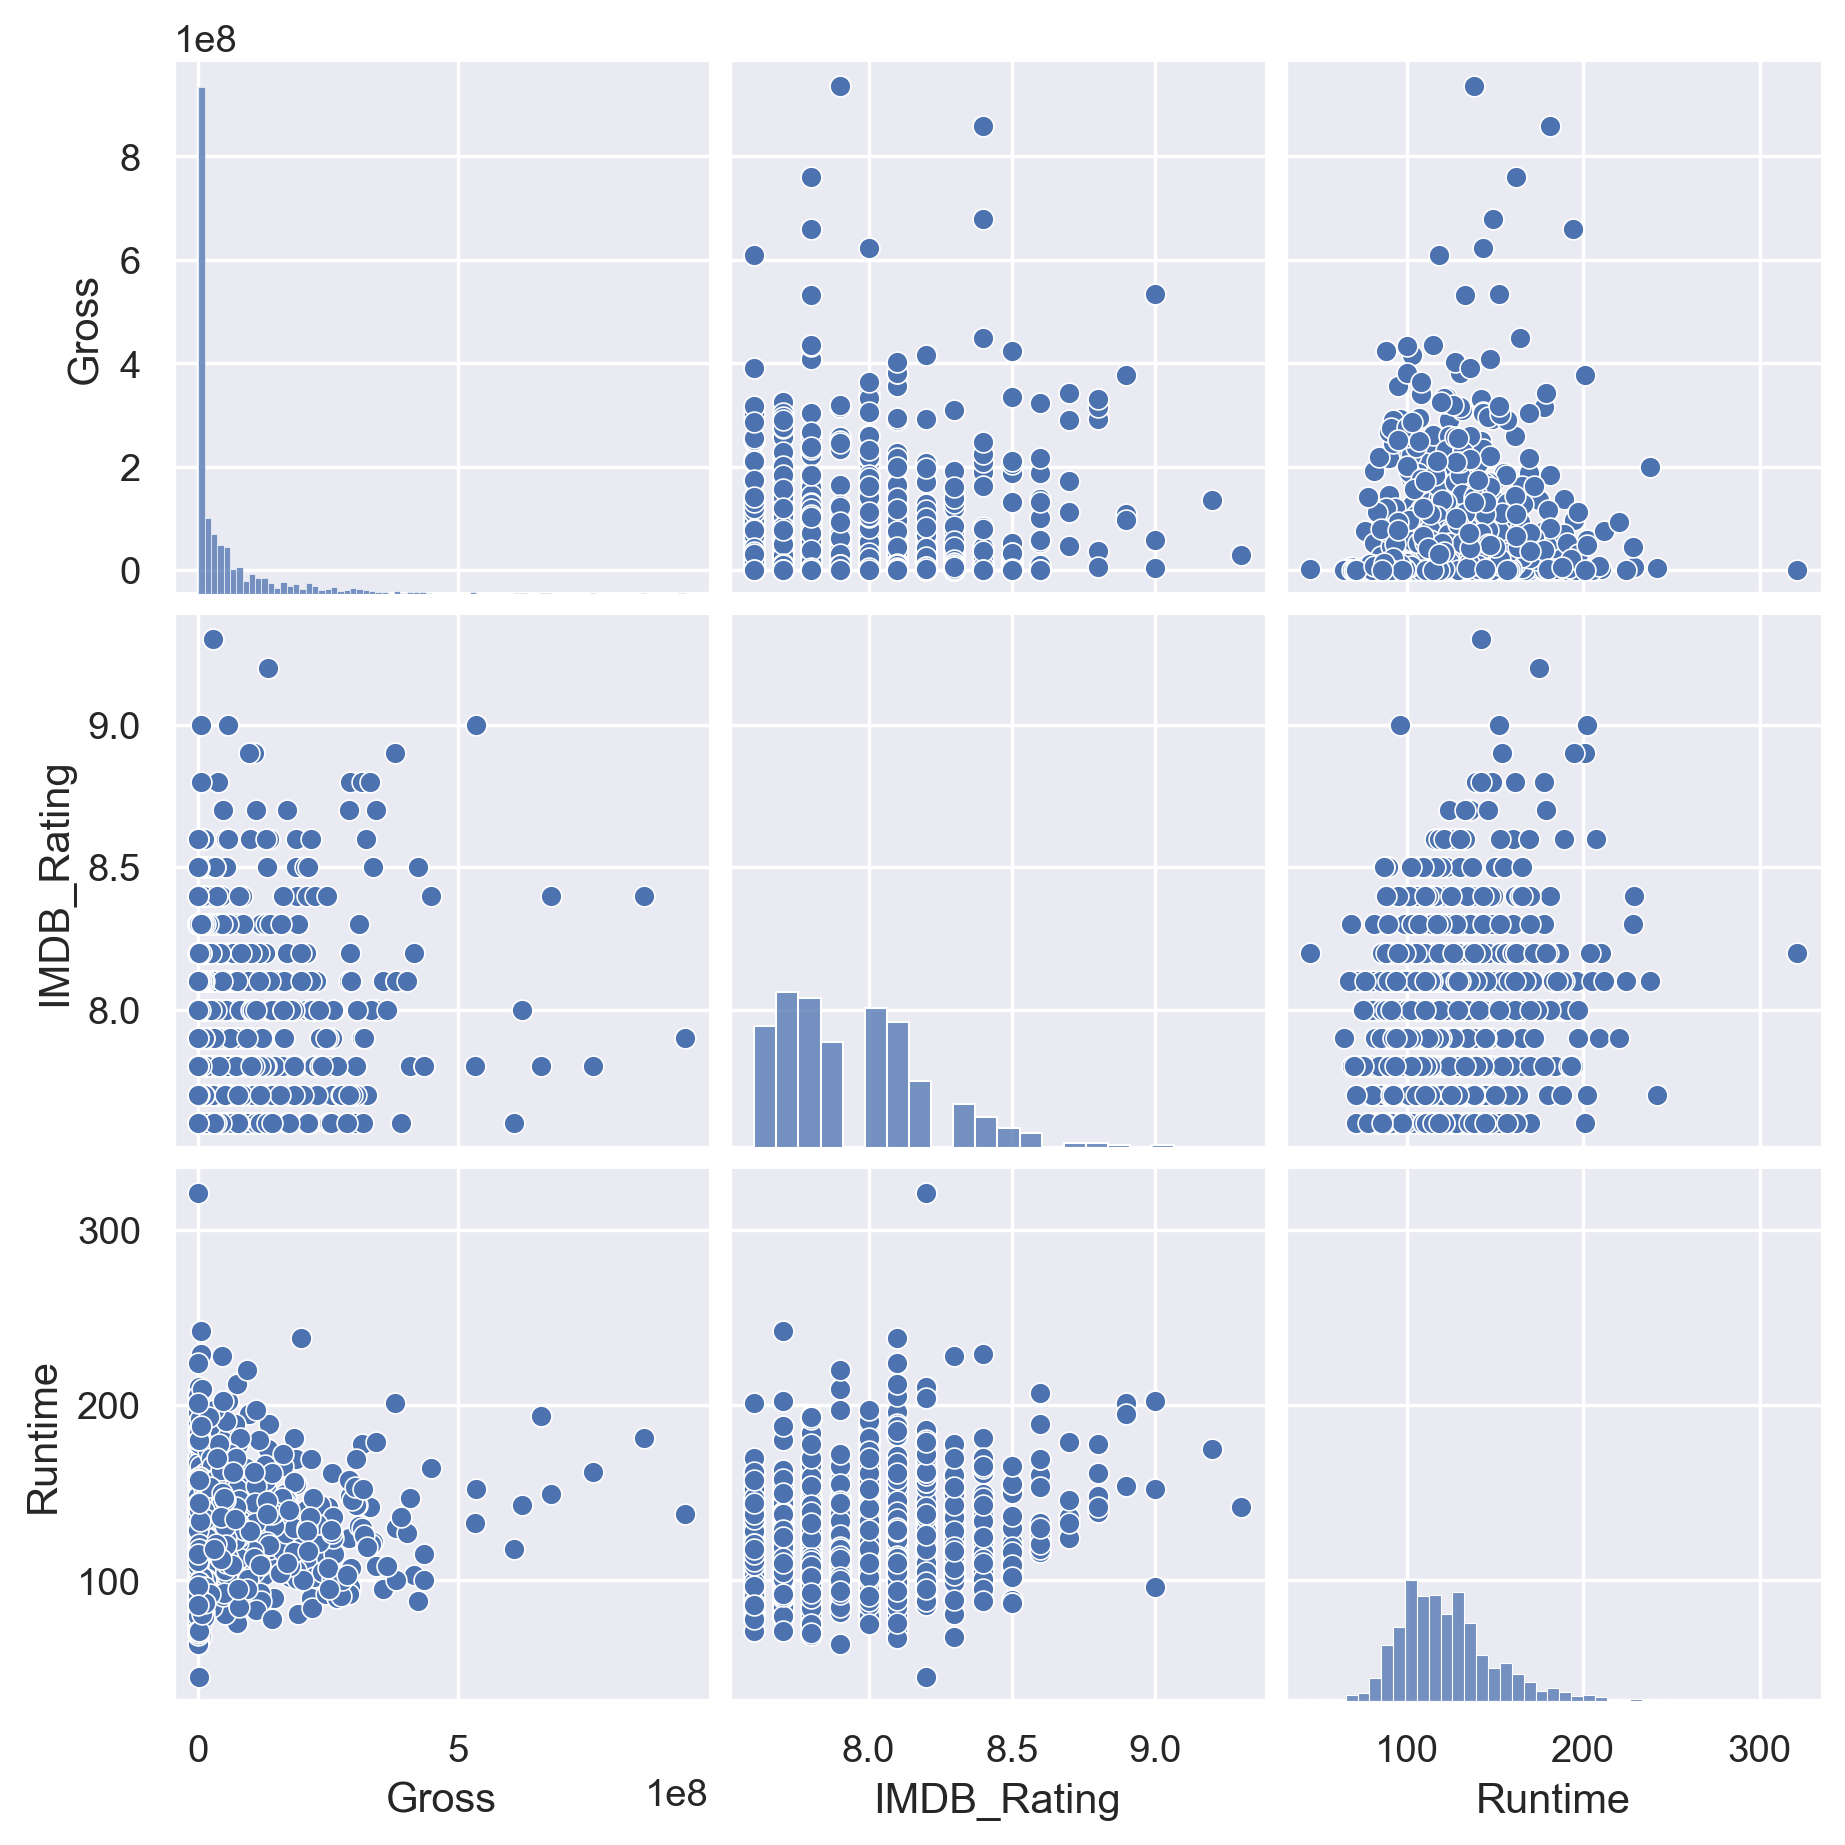

In [366]:
sns.pairplot(data_df[['Gross', 'IMDB_Rating', 'Runtime']]);

# Descriptive statistics

In [367]:
time = data_df['Runtime']
rate = data_df['IMDB_Rating']
gross = data_df['Gross']
overall={'info type':['mean', 'median', 'min','max', 'std'],'Runtime':[time.mean(), time.median(), time.min(), time.max(), time.std()], 'IMDB_Rating':[rate.mean(), rate.median(), rate.min(), rate.max(), rate.std()], 'Gross':[gross.mean(), gross.median(), gross.min(), gross.max(), gross.std()]}
overall_info = pd.DataFrame.from_dict(overall)
display(overall_info)


,info type,Runtime,IMDB_Rating,Gross
0,mean,122.891000,7.949300,5.653688e+07
1,median,119.000000,7.900000,1.070275e+07
2,min,45.000000,7.600000,0.000000e+00
3,max,321.000000,9.300000,9.366622e+08
4,std,28.093671,0.275491,1.032382e+08


### Let's find out, who are the most influential directors. Their impact was counted as the sum of ratings of all their films in  top-1000 IMDB movies.

Top 1 - Alfred Hitchcock
Top 2 - Steven Spielberg
Top 3 - Hayao Miyazaki
Top 4 - Akira Kurosawa
Top 5 - Martin Scorsese
Top 6 - Stanley Kubrick
Top 7 - Billy Wilder
Top 8 - Woody Allen
Top 9 - Christopher Nolan
Top 10 - Quentin Tarantino
Top 11 - David Fincher
Top 12 - Clint Eastwood


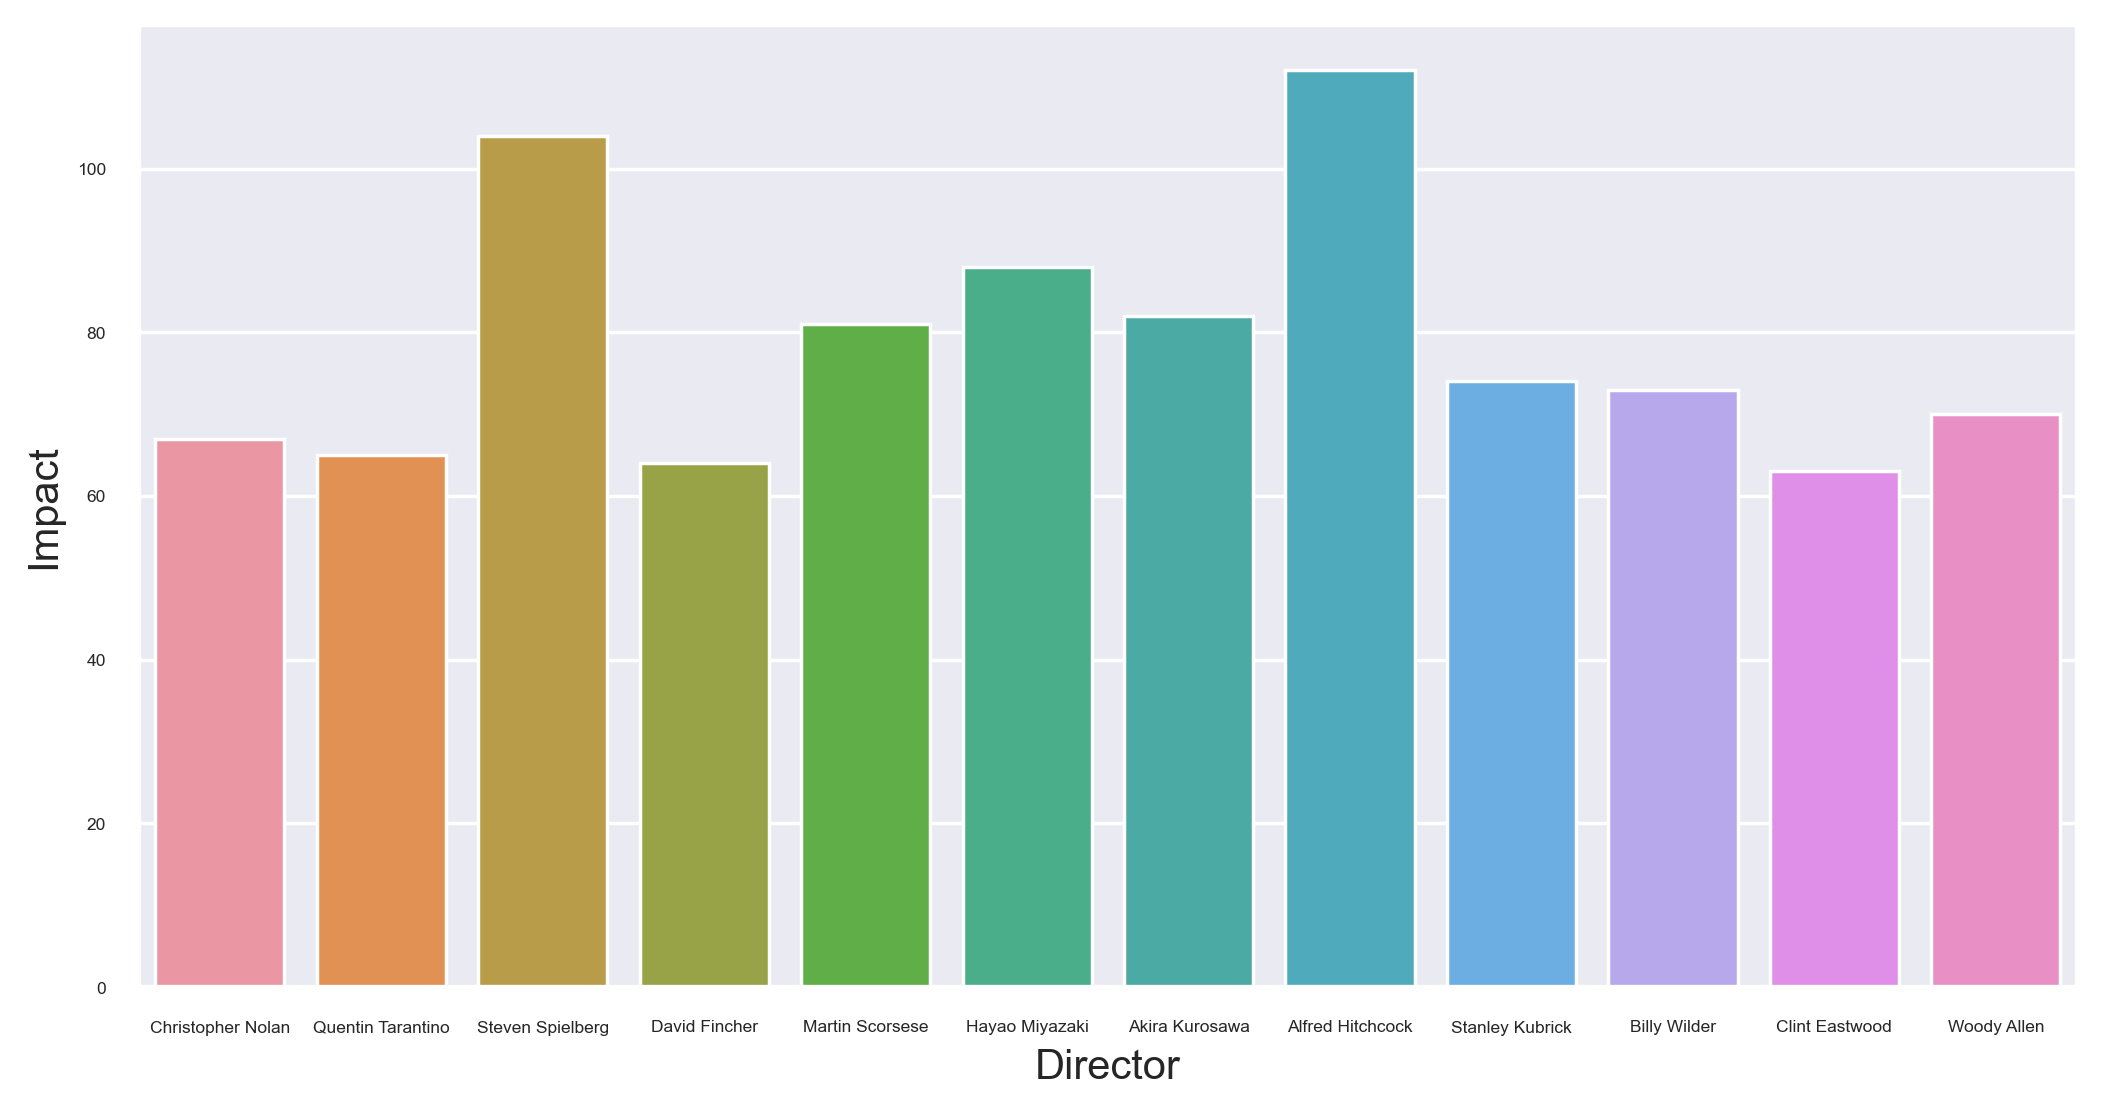

In [368]:
directors_top = {}
the_best = {}
for i in data_df['Director']:
    if i not in directors_top:
        directors_top[i] = int(sum(data_df[data_df['Director'] == i]['IMDB_Rating']))
        if int(sum(data_df[data_df['Director'] == i]['IMDB_Rating'])) >= 60:
            the_best[i] =  directors_top[i]
the_best = {'Director': [i for i in the_best], 'Impact' : [float(the_best[i]) for i in the_best]}
the_best = pd.DataFrame.from_dict(the_best)
#sns.set_theme(rc={"figure.dpi": 250})
 
sns.barplot(data=the_best, x="Director", y='Impact').tick_params(labelsize=5)
position = 1
for i in list(sorted(the_best['Impact'])[::-1]):
    print('Top', position, '-', list(the_best[the_best['Impact'] == i]['Director'])[0])
    position += 1
    

### Which ratings are the most profitable?

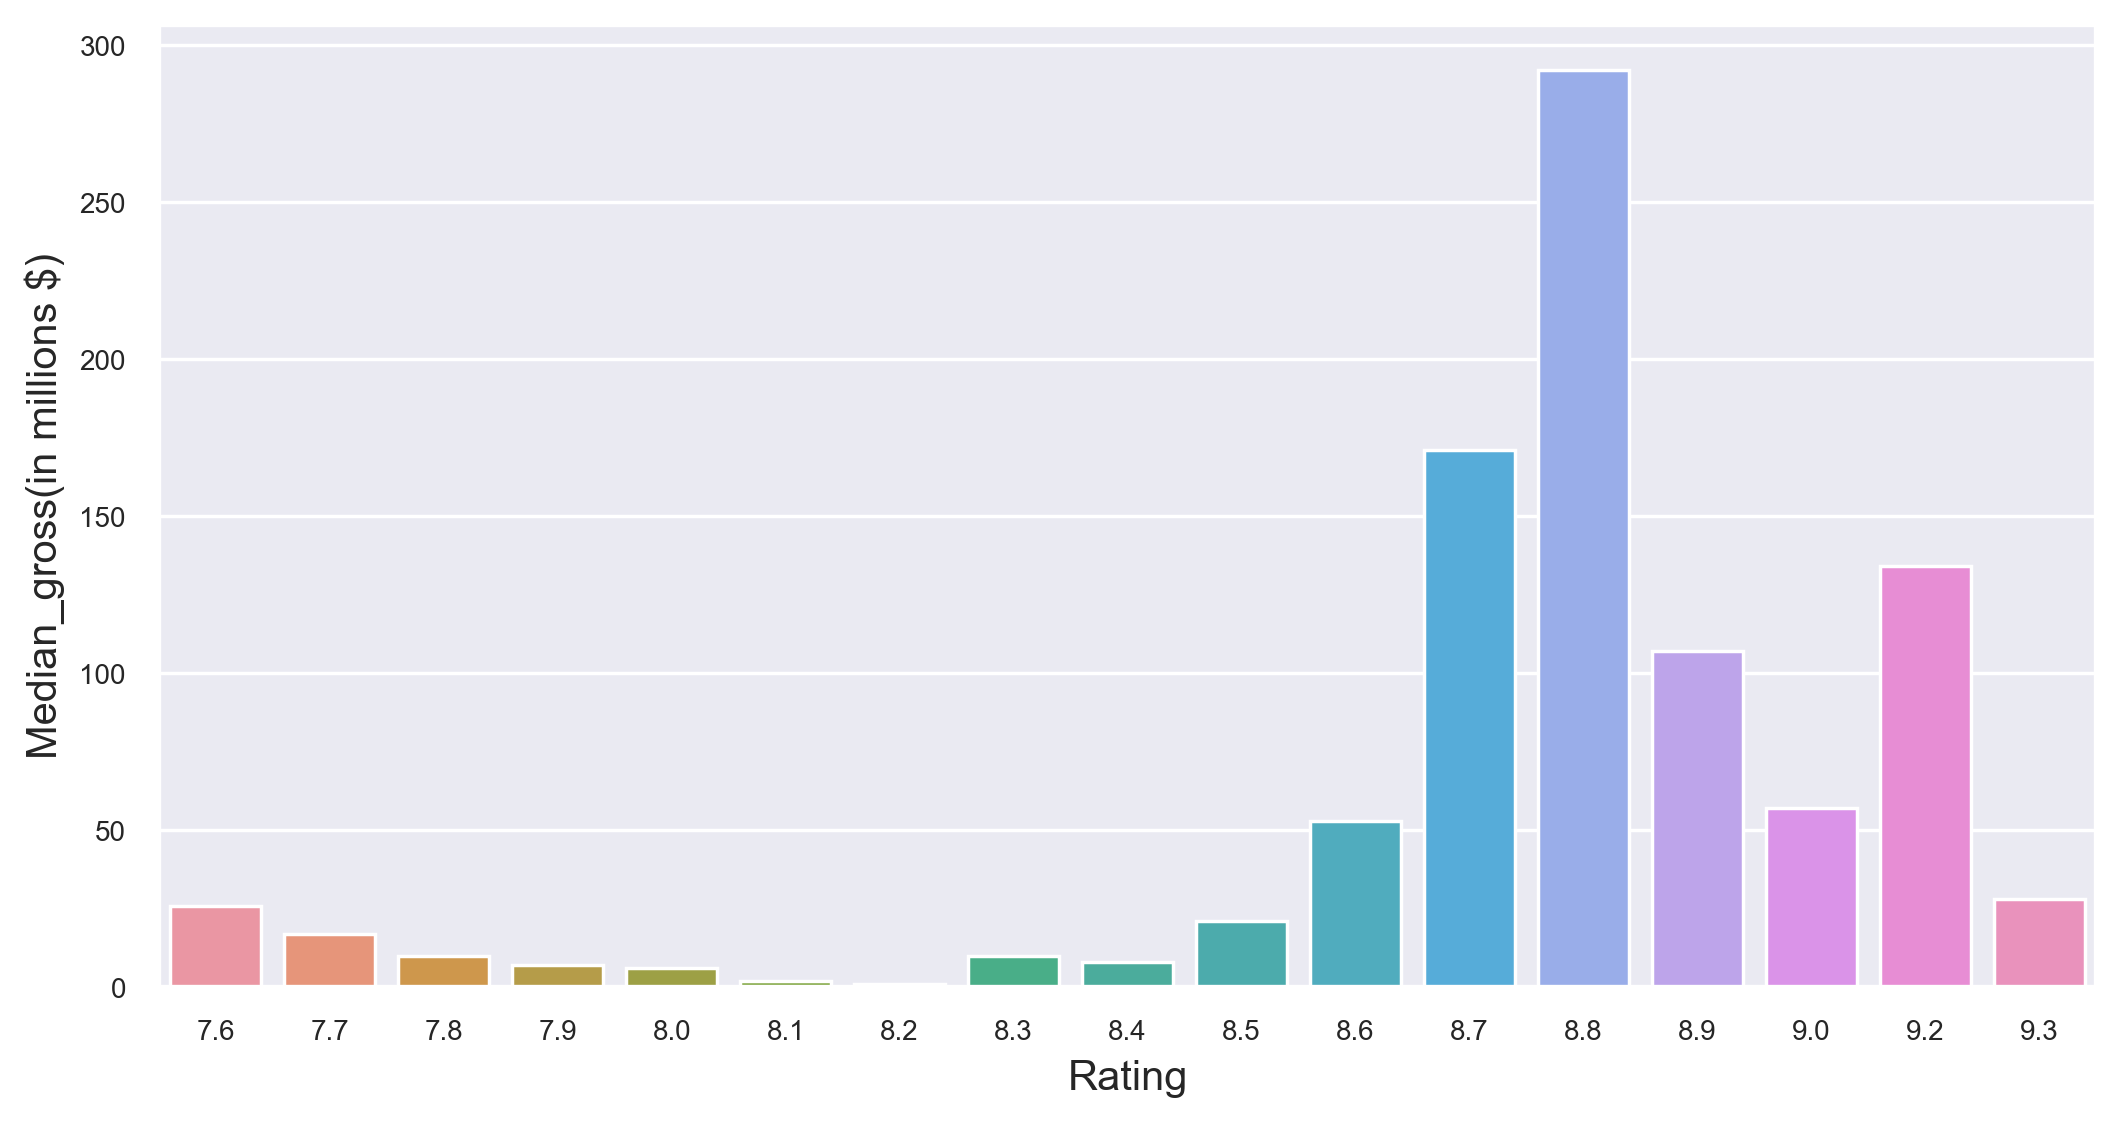

In [369]:

ranks = data_df['IMDB_Rating']
rank_to_gross = pd.DataFrame.from_dict({'Rating': [i for i in ranks], 'Median_gross(in millions $)': [int(data_df[data_df['IMDB_Rating'] == i]['Gross'].median()//1000000) for i in ranks]})


sns.barplot(data=rank_to_gross, x="Rating", y='Median_gross(in millions $)').tick_params(labelsize=8)

### Let's check if there is a dependence between film rating and it's runtime.


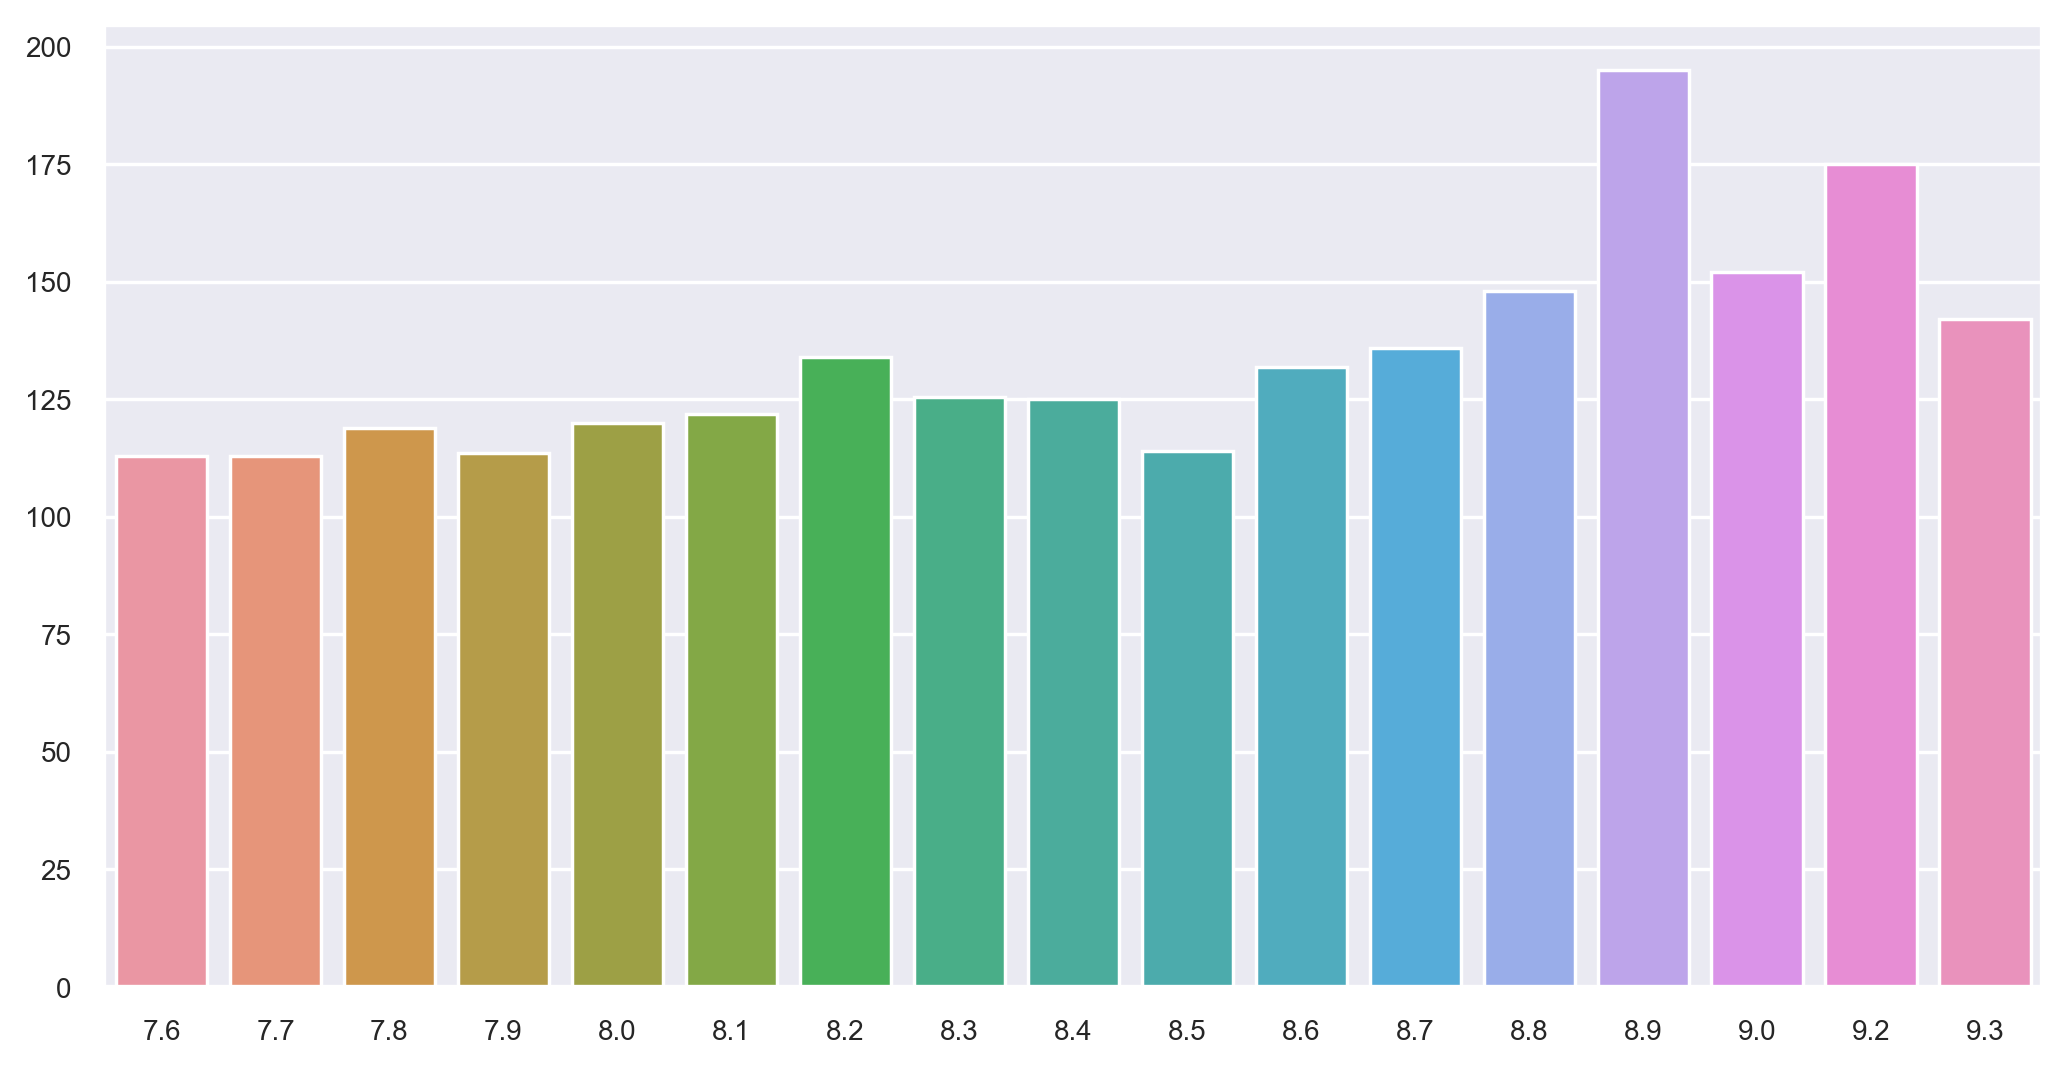

In [370]:
info = {'Rating':[], 'Average_runtime':[]}
for i in list(set(data_df['IMDB_Rating'])):
    info['Rating'].append(i)
    info['Average_runtime'].append(data_df[data_df['IMDB_Rating'] == i]['Runtime'].median())


sns.barplot(x=info["Rating"], y=info['Average_runtime']).tick_params(labelsize=8)

#### Although there is a slight change,  it is probably impossible to find any tendency here.


#   ---

# Hypothesis checking - Do economic factors influence film industry? 

### Let's take US and World GDP levels over the last 60 years to check the hypothesis.

#### Importing data about GDP  in year a film was released from GDP by year dataset and including it in our initial dataset:

In [373]:
gdp = pd.read_csv("gdp_csv.csv")
display(gdp.head(5))
new_col = []
new_col1 = []
for i in list(data_df['Released_Year']):
    a = list(gdp[(gdp['Country Name'] == 'United States') & (gdp['Year'] == i)]['Value'])
    if len(a) != 0:
        new_col.append(a[0])
    else:
        new_col.append(list(gdp[(gdp['Country Name'] == 'United States') & (gdp['Year'] == 1960)]['Value'])[0])
for i in list(data_df['Released_Year']):
    a = list(gdp[(gdp['Country Name'] == 'World') & (gdp['Year'] == i)]['Value'])
    if len(a) != 0:
        new_col1.append(a[0])
    else:
        new_col1.append(list(gdp[(gdp['Country Name'] == 'World') & (gdp['Year'] == 1960)]['Value'])[0])
data_df['gdp_us'] = new_col
data_df['gdp_world'] = new_col1
display(data_df.head(7))

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,gdp_us,gdp_world
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,7.308755e+12,2.776751e+13
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,1.282449e+12,3.767674e+12
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,1.471858e+13,6.346181e+13
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,1.548825e+12,5.296032e+12
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,5.433000e+11,1.366678e+12
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201,Action,8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905,1.151067e+13,3.889406e+13
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,Crime,8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762,7.308755e+12,2.776751e+13


### Let's compare 4 plots: World GDP by year, US GDP by year, The amount of fillms, which got into in IMDB top-1000 by year, total gross of all movies by year.

Text(2000, 500000000, '2008 Great Recession\n consequences')

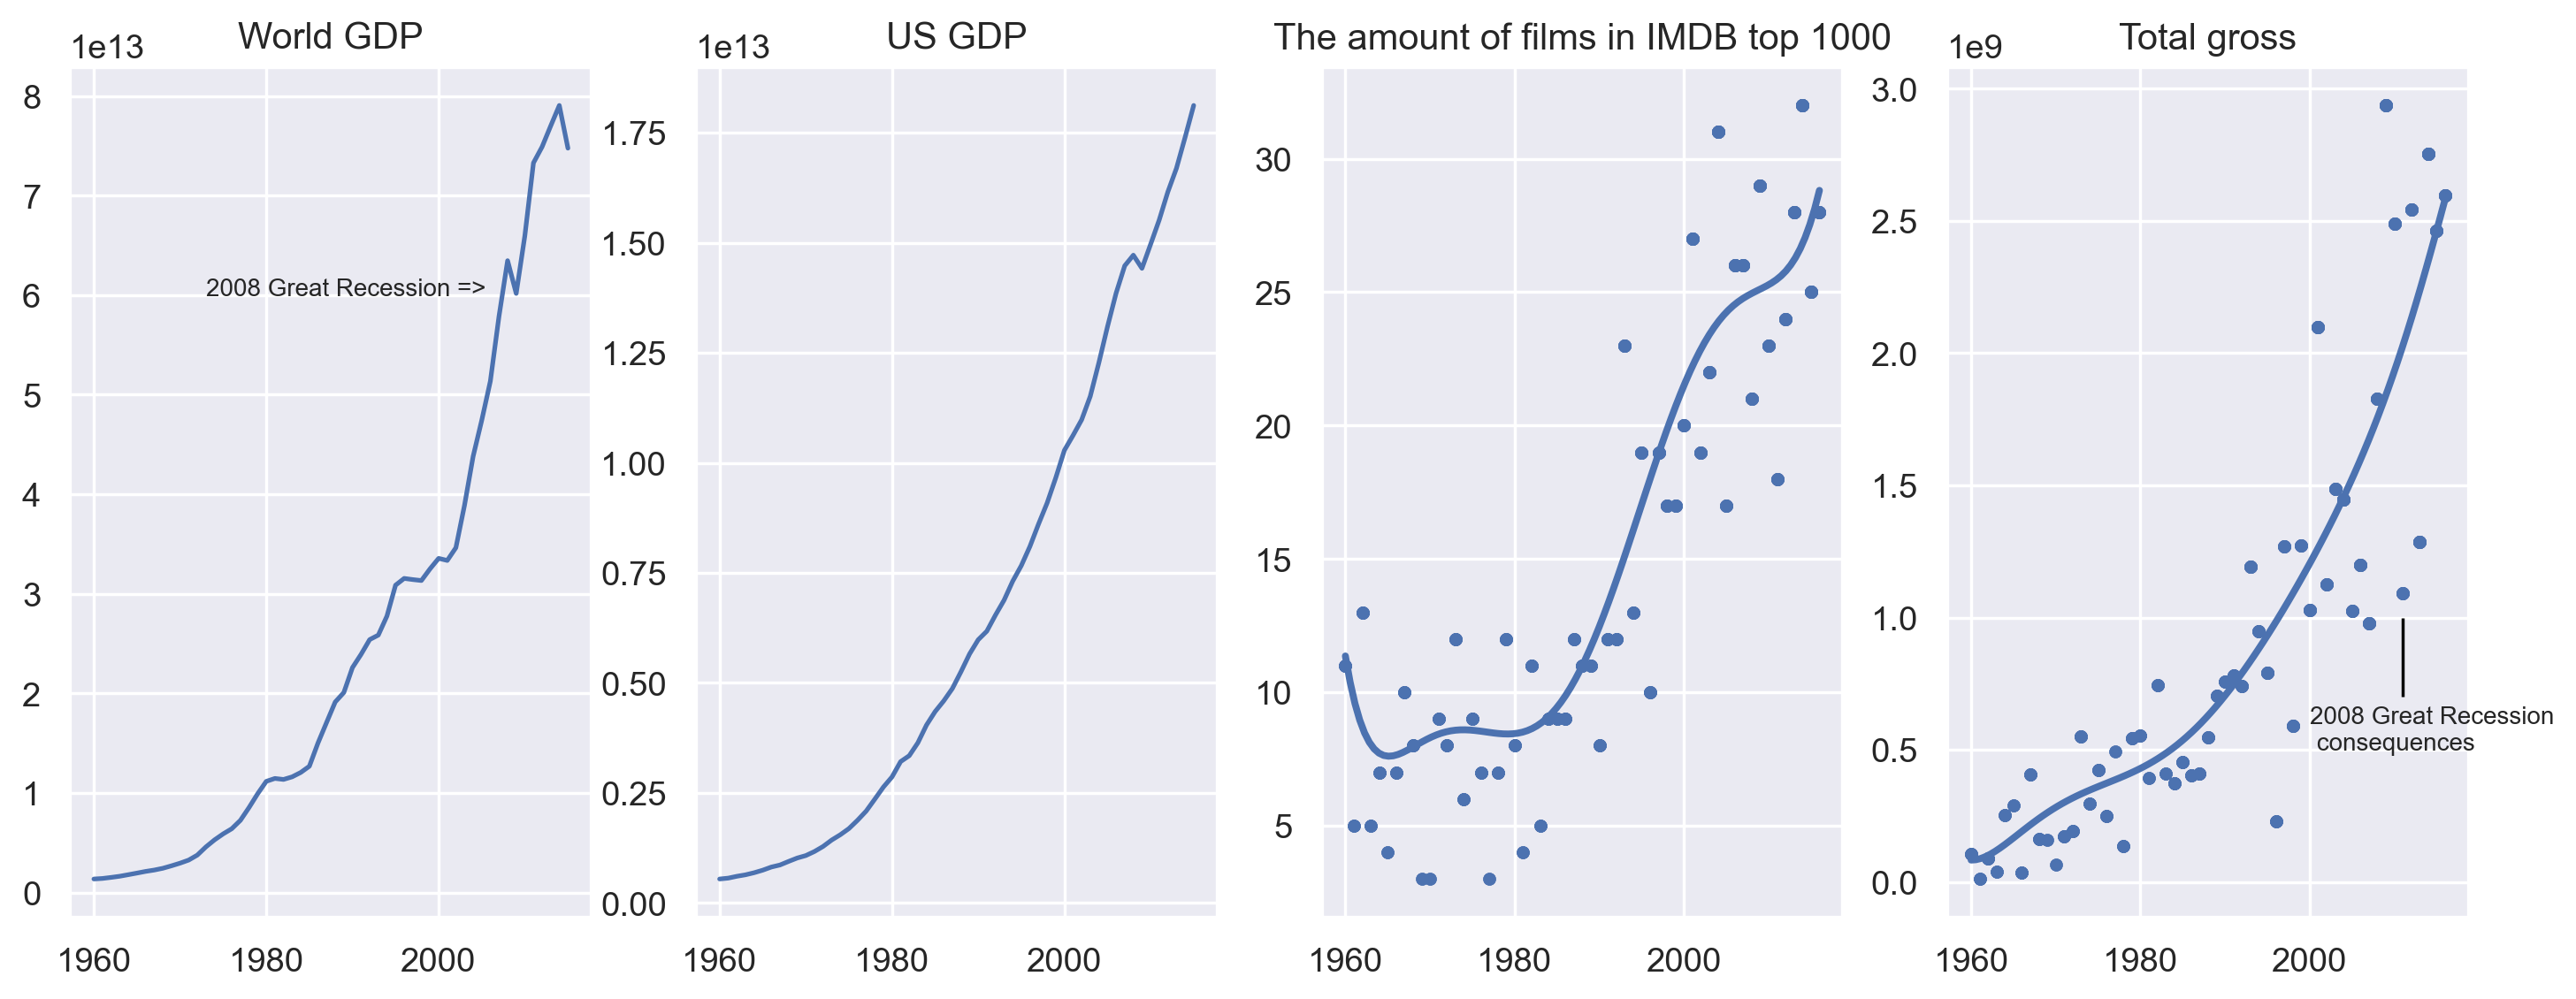

In [372]:
used_x1 = []
y11 =[]
info = {'Year' : [], 'gdp_us':[], 'gdp_world':[]}
for i in set(list(data_df['Released_Year'])):
    if i >= 1960 and i < 2016:
        info['Year'].append(i)
        info['gdp_us'].append(list(data_df[data_df['Released_Year'] == i]['gdp_us'])[0])
        info['gdp_world'].append(list(data_df[data_df['Released_Year'] == i]['gdp_world'])[0])
#         info['gdp'].append(int(list(gdp[(gdp['Year'] == i) & (gdp['Country Name'] == 'United States')]['Value'])[0] / 1000000000))
# y11 = list(set(sorted(y11)))
# used_x1 = list(set(sorted(used_x1)))
# used_y2 = []
fig, axes = plt.subplots(1, 4, figsize=(14, 5))
fig.suptitle('')
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(ax=axes[0], x=info['Year'], y=info['gdp_world'])
sns.lineplot(ax=axes[1], x=info['Year'], y=info['gdp_us'])
used_x = []
y1 =[]
for i in list(data_df['Released_Year']):
    if i >= 1960 and i <= 2016:
        used_x.append(i)
        y1.append(list(data_df['Released_Year']).count(i))
sns.regplot(ax=axes[2], x=used_x, y=y1,scatter_kws={"s": 10},
                 order=55, 
                 ci=None)
axes[1].set_title('US GDP')
axes[0].set_title('World GDP')
axes[2].set_title('The amount of films in IMDB top 1000')
axes[3].set_title('Total gross')
used_x2 = []
y12 =[]

for i in list(data_df['Released_Year']):
    if i >= 1960 and i <= 2016:
        used_x2.append(i)
        y12.append(sum(list(data_df[data_df['Released_Year'] == i]['Gross'])))

sns.regplot(x=used_x2, y=y12,scatter_kws={"s": 10},
                 order=55, 
                 ci=None)
axes[0].text(x=1973, y=60000000000000, s='2008 Great Recession =>', fontsize=8)
axes[3].arrow(2011, 700000000, 0, 300000000, fc='black', ec='black')
axes[3].text(x=2000, y=500000000, s='2008 Great Recession\n consequences', fontsize=8)

#### As we can see, although the data is pretty volatile, there some sort of common tendency (especially if we are talking about total gross and World GDP). We can clearly see some consequences of world economic crisises in total gross. For example, there is a short but clear dicline in total gross and the amount of high-rated movies right after 2008 Great Recession. 